# DataScience Course 01 (Lecturer: Reza Shokrzad)



# Assignment 2

## Students
Please fill in your names:
* Mohammad Amini Nasab
* Ramin Ayat
* Mohammad Ostovari
* Ali Javanmard


### Instructions
* You can __work in groups__. __Write the full name of all team members in the header above.__
* Make sure you __fill in any place that says__ "YOUR CODE HERE" or "YOUR ANSWER HERE" __including comments, derivations, explanations, graphs, etc.__ This means that the elements and/or intermediate steps required to derive the answer have to be in the report. 
* Answers like 'No' or 'x=27.2' by themselves are not sufficient, even when they are the result of running your code. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends (if applicable).
* Please do not add new cells, __write the answers only in the provided cells__. 
* Before you turn this problem in, make sure everything runs as expected. First, *restart the kernel* (in the menubar, select Kernel$\rightarrow$Restart) and then *run all cells* (in the menubar, select Cell$\rightarrow$Run All). 
* __Swnd your report to @cafetadris_ds in Telegram as a single (notebook) / .ipynb file containing the submitter's names and 'DS01_Assg02';
* For any problems or questions, send me message on Discord.

# Libraries
First, you will import the basic libraries necessary to develop this assignment which have been provided already. Of course you are free to import further libraries, if required, in the allotted cells.

In [ ]:
# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple

import pandas as pd
from IPython.display import display

# Set fixed random seed for reproducibility
np.random.seed(2020)

# plotting setup
sns.set_theme()
sns.set(rc={'figure.figsize': (11.7, 8.27)})

### Exercise 1 (weight 60)
Consider once more the $M$-th order polynomial 
$$y(x;\mathbf{w}) = w_0 + w_1 x + \ldots + w_M x^M  = \sum_{j=0}^M w_j x^j 
\label{yxw} \tag{1}$$

### Exercise 1.1
Create the function $f(x) = 1 + \sin(6(x - 2))$. Generate a data set $\mathcal{D}_{10}$ of 10 noisy observations of this function. Take the 10 inputs spaced uniformly in range $[0,1]$, and assume that the noise is Gaussian with mean 0 and standard deviation 0.3. $\mathcal{D}_{10}$ will be the training set. In a similar way, generate an additional test set $\mathcal{T}$ of 100 noisy observations over the same interval. Plot both the function and observations in $\mathcal{D}_{10}$ in a single graph (similar to Bishop, Fig.1.2).

In [ ]:
def f(x):
  """
  This function computes (x)=1+sin(6(x−2))

  Parameters
  ----------
  x : float
      Input number.

  Returns
  -------
  float
      Result of the function.
  """
  return 1 + np.sin(6 * (x - 2))

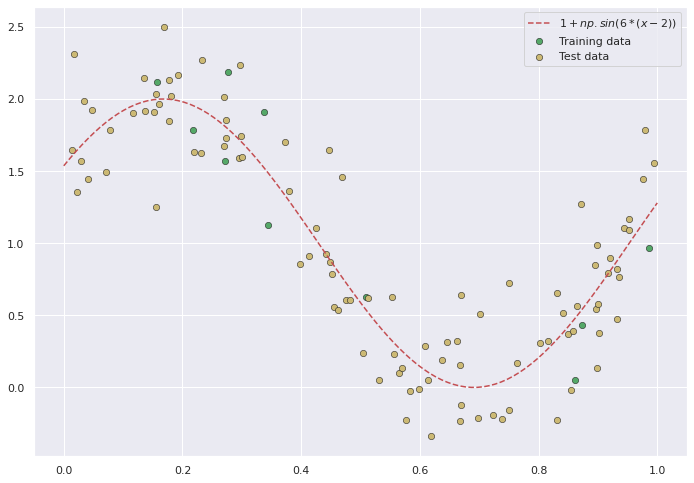

In [ ]:
"""
  Generate a data set of N_train noisy observations of the function f. Take the inputs spaced uniformly
  in range [0,1], and add Gaussian noise with mean 0 and standard deviation 0.3.

  Variable names
  --------------
  N_train : int
      number of training observations
  X_train : array
      N_train x 1 vector of x-coordinates, uniformly distributed on [0, 1]
  t_train : array
      N_train x 1 vector with corresponding t-values, adding Gaussian noise
  D_train : matrix
      N_train x 2 matrix, the training data created from X_train and t_train

  N_test : int
      number of data points for testing
  X_test : array
      N_test x 1 vector of random x-coordinates taken form a uniform distribution
  t_test : array
      N_test x 1 vector with corresponding t-values, adding Gaussian noise
  D_test : matrix
      N_test x 2 matrix, the test data created from X_test and t_test
  """


def generate_data(N_train, N_test):
  np.random.seed(2020)

  X_train = np.sort(np.random.uniform(0, 1, N_train))
  t_train = f(X_train) + np.random.normal(0, 0.3, N_train)

  # D_train is a matrix with N_train rows and 2 columns
  D_train = np.column_stack((X_train, t_train))

  X_test = np.sort(np.random.uniform(0, 1, N_test))
  t_test = f(X_test) + np.random.normal(0, 0.3, N_test)

  # D_test is a matrix with N_test rows and 2 columns
  D_test = np.column_stack((X_test, t_test))

  return D_train, D_test


D_train, D_test = generate_data(10, 100)

x_interval = np.linspace(0, 1, 100)
sns.lineplot(x=x_interval,
             y=f(x_interval),
             color='r',
             linestyle='--',
             label='$1 + np.sin(6 * (x - 2))$')
sns.scatterplot(x=D_train[:, 0],
                y=D_train[:, 1],
                color='g',
                s=40,
                edgecolor='k',
                label='Training data')
sns.scatterplot(x=D_test[:, 0],
                y=D_test[:, 1],
                color='y',
                s=40,
                edgecolor='k',
                label='Test data')

### Exercise 1.2
Create a function `polynomial_curve_fit(D,M)` that takes as input a data set $\mathcal{D}_{N}$, consisting of $N$ input/output-pairs $\{x_n,t_n\}$, and a parameter $M$, representing the order of the polynomial in $\eqref{yxw}$, and outputs a vector of weights $\mathbf{w} = [w_0, \dots, w_M]$ that minimizes the sum-of-squares error function
\begin{equation*} E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \{ y(x_{n} ; \mathbf{w}) - t_{n} \} ^2 \tag{2} \end{equation*}
Hint: use  `np.linalg.solve` to solve a linear system of equations.

In [ ]:
def polynomial_curve_fit(D, M):
  ''' This functions computes the value of a polynomial with weights w on data points x.

  Parameters
  ----------
  D : array
      Input dataset D.
  M : int
      The degree of the polynomial.

  Returns
  -------
  float
      Fitted weight vector w that minimizes the sum-of-squares function.
  '''
  #! didn't understand.
  # further information: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

  # Generate A matrix
  x = D[:, 0]
  y = D[:, 1]
  demention = M + 1
  A = np.zeros((demention, demention))
  for i in range(demention):
    for j in range(demention):
      A[i, j] = sum(x**(i + j))

  # A is like = [
  #               [1, x],
  #               [x^2, x^3]
  #             ]

  # Generate T vector
  T = np.zeros(demention)
  for i in range(demention):
    T[i] = sum(y * x**i)

  # solve A @ w = T for w
  w = np.linalg.solve(A, T)

  return w

### Exercise 1.3
For the given dataset $\mathcal{D}_{10}$, run the `polynomial_curve_fit(D,M)` function for $M = [0, \dots, 9]$,  and, 
* Plot for various orders $M$ (at least for $M=0, M=1, M=3, M=9$) the resulting polynomial, together with the function $f$ and observations $\mathcal{D}_{10}$ (similar to Bishop, Fig 1.4)
* For each order $M \in [0, \dots, 9]$,  compute the root-mean-square error
\begin{equation*} E_{\text{RMS}} = \sqrt{2 E(\mathbf{w^*})/N} \tag{3} \end{equation*}
of the corresponding polynomial, evaluated on both the training set $\mathcal{D}_{10}$ and the testset $\mathcal{T}$.  Plot both as a function of $M$ in a single graph. (see Bishop, Fig.1.5).

First define the `polynomial` function to help you with calculating the predictions of outputs for the training and test data given w.

In [ ]:
def polynomial(x, w):
  ''' This functions computes the value of a polynomial with weights w on data points x.

  Parameters
  ----------
  x : float
      Set of x-coordinates for which to evaluate the polynomial.
  w : float
      Input weight vector of size M+1 (for polynomial of degree M).

  Returns
  -------
  float
      Values of polynomial with weights w evaluated at x.
  '''

  return sum(w[i] * x**i for i in range(len(w)))  # w0 + w1 * x + w2 * x**2 + ...

Now with the help of `polynomial` calculate the predictions. Then calculate the root-mean-square-error and 
create plots for various orders of $M$.

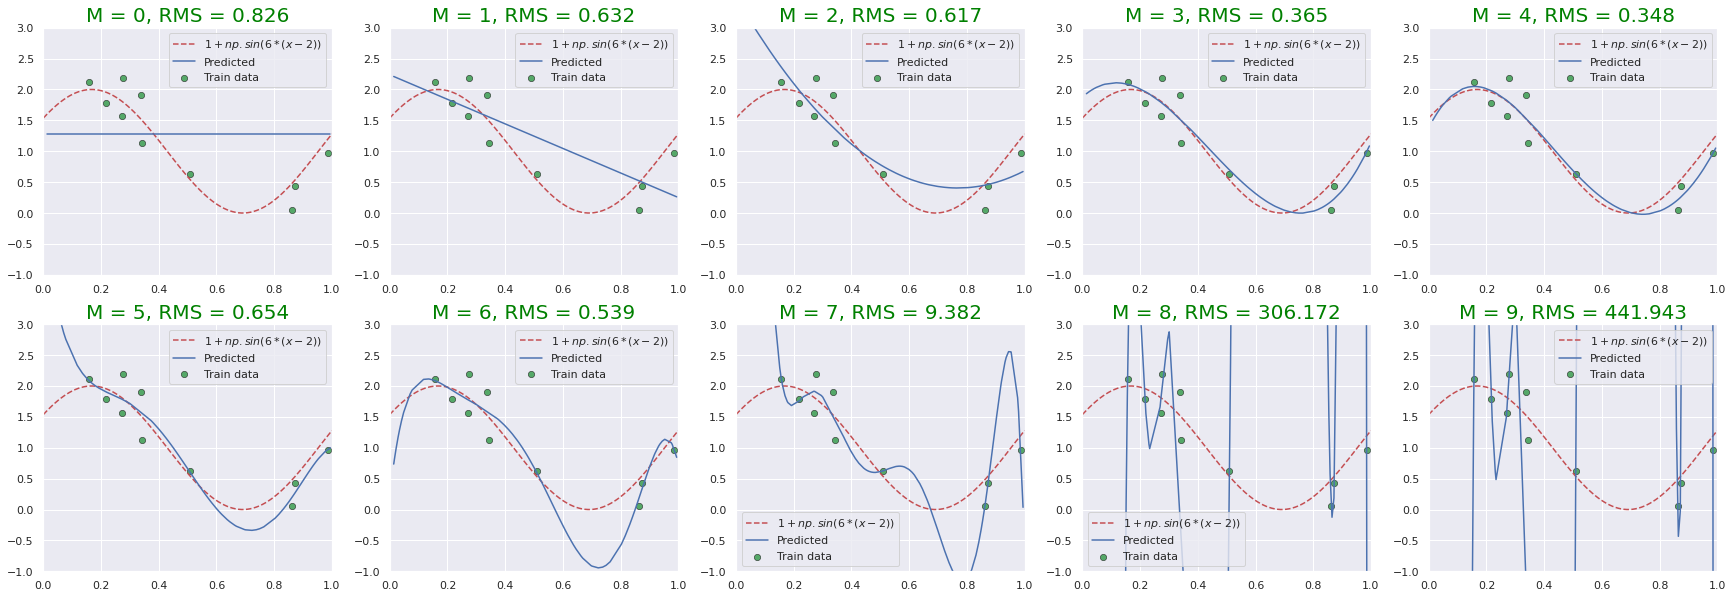

In [ ]:
def root_mean_square(predicted, actual):
  return np.sqrt(np.mean(np.power(predicted - actual, 2)))


degrees = range(10)
x_interval = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(30, 10))

for d in degrees:
  w = polynomial_curve_fit(D_train, d)
  predected = polynomial(D_test[:, 0], w)
  rms = root_mean_square(predected, D_test[:, 1])

  plt.subplot(2, 5, degrees.index(d) + 1)

  sns.lineplot(x=x_interval,
               y=f(x_interval),
               color='r',
               linestyle='--',
               label='$1 + np.sin(6 * (x - 2))$')
  sns.scatterplot(x=D_train[:, 0],
                  y=D_train[:, 1],
                  color='g',
                  s=40,
                  edgecolor='k',
                  label='Train data')
  sns.lineplot(x=D_test[:, 0],
               y=predected,
               color='b',
               linestyle='-',
               label='Predicted')

  plt.xlim((0, 1))
  plt.ylim((-1, 3))
  plt.title(f'M = {d}, RMS = {rms:.3f}', fontsize=20, color="green")

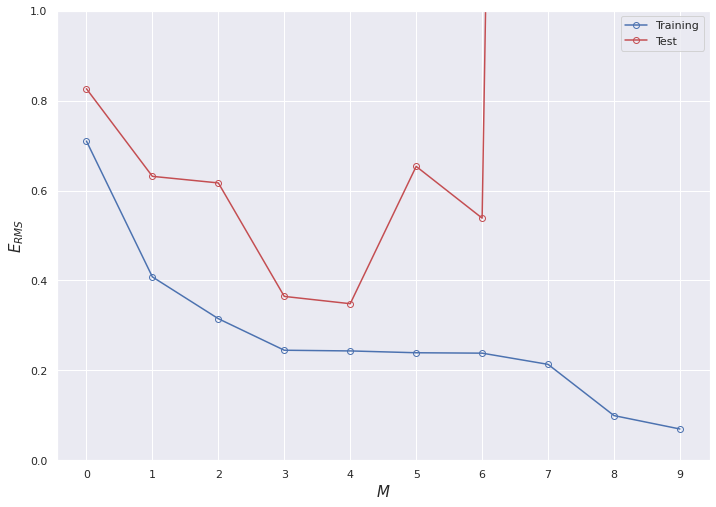

In [ ]:
rms_train = []
rms_test = []
for M in range(10):
  w = polynomial_curve_fit(D_train, M)

  rms_test.append(root_mean_square(polynomial(D_test[:, 0], w), D_test[:, 1]))
  rms_train.append(
      root_mean_square(polynomial(D_train[:, 0], w), D_train[:, 1]))

plt.plot(range(10), rms_train, 'b-o', mfc='none', label='Training')
plt.plot(range(10), rms_test, 'r-o', mfc='none', label='Test')

plt.ylabel('$E_{RMS}$', fontsize=15)
plt.xlabel('$M$', fontsize=15)
plt.xticks(range(10))
plt.ylim((0, 1))
plt.legend()
plt.show()

### Exercise 1.4
Repeat this procedure for a data set $\mathcal{D}_{40}$ of  40 observations (with the same noise level) and compare with the previous result.

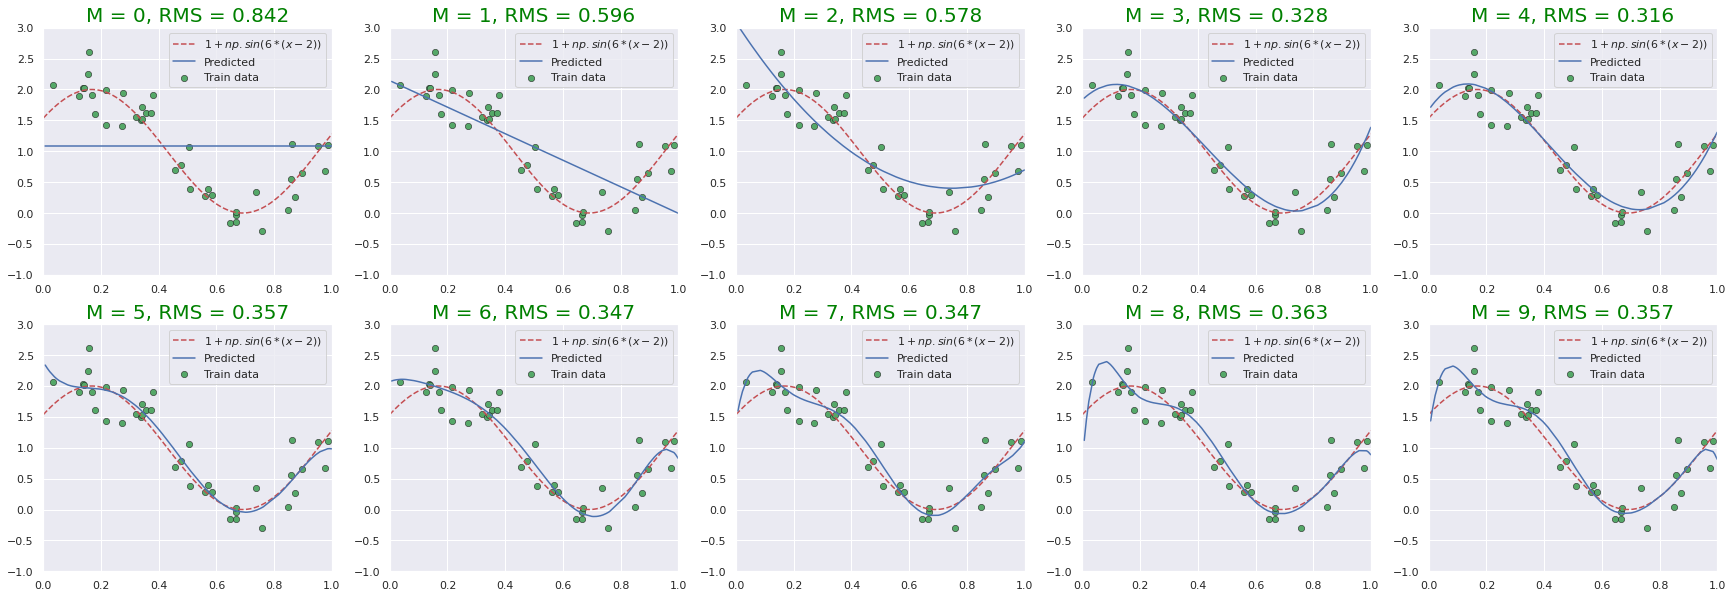

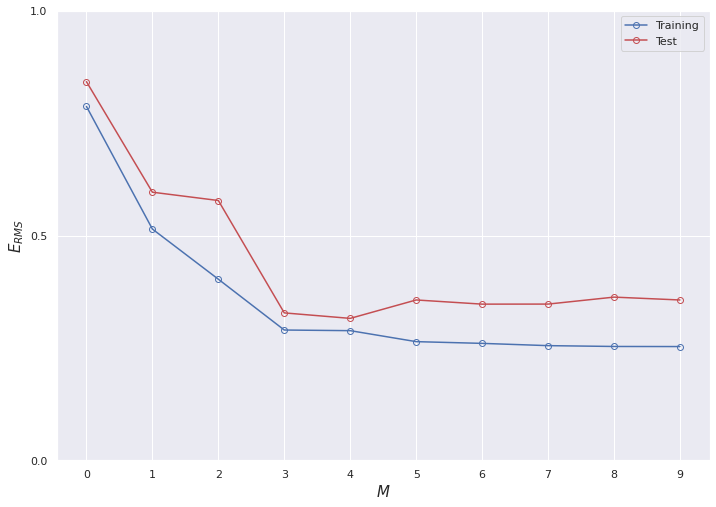

In [ ]:
# Generate Data
D_train, D_test = generate_data(40, 100)

degrees = range(10)
x_interval = np.linspace(0, 1, 100)
fig = plt.figure(figsize=(30, 10))
for d in degrees:
  w = polynomial_curve_fit(D_train, d)
  predected = polynomial(D_test[:, 0], w)
  rms = root_mean_square(predected, D_test[:, 1])

  plt.subplot(2, 5, degrees.index(d) + 1)

  sns.lineplot(x=x_interval,
               y=f(x_interval),
               color='r',
               linestyle='--',
               label='$1 + np.sin(6 * (x - 2))$')
  sns.scatterplot(x=D_train[:, 0],
                  y=D_train[:, 1],
                  color='g',
                  s=40,
                  edgecolor='k',
                  label='Train data')
  sns.lineplot(x=D_test[:, 0],
               y=predected,
               color='b',
               linestyle='-',
               label='Predicted')

  plt.xlim((0, 1))
  plt.ylim((-1, 3))
  plt.title(f'M = {d}, RMS = {rms:.3f}', fontsize=20, color="green")
plt.show()

# plot RMS for M = [0, 1, ..., 9]
rms_train = []
rms_test = []
for M in range(10):
  w = polynomial_curve_fit(D_train, M)
  rms_test.append(root_mean_square(polynomial(D_test[:, 0], w), D_test[:, 1]))
  rms_train.append(
      root_mean_square(polynomial(D_train[:, 0], w), D_train[:, 1]))

plt.plot(range(10), rms_train, 'b-o', mfc='none', label='Training')
plt.plot(range(10), rms_test, 'r-o', mfc='none', label='Test')

plt.ylabel('$E_{RMS}$', fontsize=15)
plt.xlabel('$M$', fontsize=15)
plt.yticks((0, .5, 1))
plt.xticks(range(10))
plt.legend()
plt.show()

YOUR ANSWER HERE

Since both models saw the train data and learned it well, the *RMSE* is less for train data.\
We overfit the first model for *M*>= 5 since there were very few train data points and the model could not generalize well. The second model, however, had more train data and was overfitted for larger *M*s.\
In both models, for *M* = 3 or *M* = 4, the model reaches balance and has neither underfitting nor overfitting.

### Exercise 1.5
Modify the `polynomial_curve_fit(D,M)` function to include an additional penalty parameter $\lambda$, for a procedure that solves the minimization problem for a modified error function with quadratic regularizer (weight decay), given as
\begin{equation*}
\tilde{E} = E + \frac{\lambda}{2} \sum_{j=0}^M w_j^2. \label{regerr} \tag{4}
\end{equation*}
Verify that the regularizer drives the weights of high order terms in the polynomial to zero, and see if you can reproduce and explain the effect observed in Bishop, Fig.1.8. (note that the values here are computed for our data, so they are not identical to the ones in Bishop)

|$\ln\lambda=$|$-\infty$ |-18    |-9    |-4   |0    |
|-------------|----------|-------|------|-----|-----|
|$w_0^*$      |0.87      |0.89   |1.13  |1.59 |1.02 |
|$w_1^*$      |-166.39   |25.44  |8.97  |-0.20|-0.38|
|$w_2^*$      |4264.93   |-178.33|-29.89|-2.73|-0.41|
|$w_3^*$      |-39400.69 |530.85 |11.83 |-1.24|-0.25|
|$w_4^*$      |185746.67 |-751.83|15.07 |-0.05|-0.11|
|$w_5^*$      |-503783.21|171.74 |3.95  |0.56 |0.01 |
|$w_6^*$      |818011.41 |604.53 |-5.68 |0.79 |0.09 |
|$w_7^*$      |-785013.15|-111.73|-8.42 |0.83 |0.17 |
|$w_8^*$      |410395.73 |-692.14|-3.61 |0.78 |0.21 |
|$w_9^*$      |-90055.14 |401.63 |7.65  |0.69 |0.25 |

In [ ]:
def polynomial_curve_fit(D, M, lmb=0):
  ''' This functions computes the value of a polynomial with weights w on data points x.

  Parameters
  ----------
  D : array
      Input dataset D.
  M : int
      The degree of the polynomial.
  lmb : float, optional
      Regularization parameter for polynomial curve fitting.

  Returns
  -------
  float
      Fitted weight vector w that minimizes the sum-of-squares function.
  '''
  # Generate A matrix
  x = D[:, 0]
  y = D[:, 1]
  demention = M + 1
  A = np.zeros((demention, demention))
  for i in range(demention):
    for j in range(demention):
      A[i, j] = sum(x**(i + j)) + lmb * (i == j)

  # Generate T vector
  T = np.zeros(demention)
  for i in range(T.shape[0]):
    T[i] = sum(y * x**i)

  # solve A @ w = T for w
  w = np.linalg.solve(A, T)

  return w

,-31.40,-27.91,-24.42,-20.93,-17.44,-13.96,-10.47,-6.98,-3.49,0.00
w0,3.650567,1.035948,1.115379,1.471016,1.988527,2.195818,2.084103,2.012886,2.407380,1.804823
w1,-92.578873,44.698321,41.666961,26.478778,5.336837,-2.088846,-0.333154,1.285765,-2.056899,-1.094066
w2,1859.703902,-509.801095,-488.644957,-304.707385,-64.601563,7.046062,1.160426,-6.827996,-2.543416,-0.938045
w3,-17968.438111,2297.554049,2405.075569,1426.654098,266.383117,-9.092880,-14.402422,-4.645024,-0.787853,-0.483997
w4,96355.414775,-3756.105949,-5690.455819,-3103.308890,-479.175213,-42.797753,-3.366623,1.074303,0.711592,-0.126821
w5,-311393.411868,-4385.944497,5625.247788,2441.543560,166.041504,28.534641,10.002219,5.066922,1.444128,0.108870
w6,630784.090941,27786.779068,675.729201,1201.281310,314.372452,54.669739,12.724896,6.038257,1.520773,0.253421
w7,-806912.473819,-47859.886975,-5114.490052,-2201.639711,-42.288413,12.068579,6.841323,4.511555,1.163007,0.336765
w8,633363.965524,41374.879128,1899.381244,-963.735417,-224.226277,-40.172791,-1.268533,1.414133,0.559483,0.380630
w9,-278594.690690,-18252.012464,1565.213727,2350.766259,-49.065568,-43.147510,-6.490357,-2.457185,-0.157768,0.399555


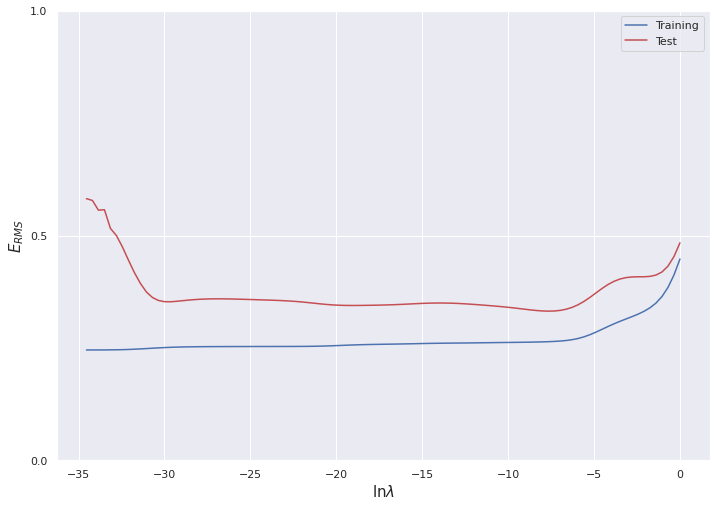

In [ ]:
# Generate Data
D_train, D_test = generate_data(40, 100)

lmbs = np.logspace(-15, 0, num=100)
M = 10
rms_train = []
rms_test = []
ws = []
for lmb in lmbs:
  w = polynomial_curve_fit(D_train, M, lmb)
  rms_train.append(
      root_mean_square(polynomial(D_train[:, 0], w), D_train[:, 1]))
  rms_test.append(root_mean_square(polynomial(D_test[:, 0], w), D_test[:, 1]))

  ws.append(w)
ws = np.array(ws)
table = pd.DataFrame(ws.T,
                     columns=[round(i, 2) for i in np.log(lmbs)],
                     index=['w' + str(i) for i in range(M + 1)])
display(table.iloc[:, 9::10]) # display from the 9th column to 99th column by 10

# plot RMS for lmbs
plt.plot(np.log(lmbs), rms_train, 'b', mfc='none', label='Training')
plt.plot(np.log(lmbs), rms_test, 'r', mfc='none', label='Test')

plt.ylabel('$E_{RMS}$', fontsize=15)
plt.xlabel('$\ln{\lambda}$', fontsize=15)
plt.yticks((0, .5, 1))
plt.legend()
plt.show()

YOUR ANSWER HERE

The table shows that the amount of weights approaches zero with increasing lambda.\
According to the graph, the RMS for both train and test data increases steeply as lambda approaches 1. In other words, the model did not learn the train and test data, so it was underfitted.
Because with increasing lambda, ‌ the amount of weights becomes more decay and the complexity of the model decreases and the model becomes underfit.\
That is similar to Bishop's book.

### Exercise 1.6
The polynomial curve fitting procedure can be extended to the case of multidimensional inputs. Assuming an input vector  of dimension $D$, namely $\mathbf{x} = (x_1, x_2, \dots, x_D)$, we can write the regression function $y$ as:
\begin{equation}
y(\mathbf{x}; \mathbf{w}) = \sum_{j = 0}^M \left( \sum_{n_1 + n_2 + ... + n_D = j} w_{n_1 n_2 ... n_D} x_1^{n_1} x_2^{n_2} ... x_D^{n_D} \right) \label{eqn:polynomial_multidimensional} \tag{5}
\end{equation}

In the last expression, $j$ refers to the order of the polynomial terms. The inner sum is over all the combinations of non-negative integers $n_1, n_2, \dots, n_D$, such that the constraint $n_1 + n_2 + \dots + n_D = j$ holds. The terms $n_1, n_2, \dots, n_D$ correspond to the exponent for each variable $x_1, x_2, \dots, x_D$ in their respective polynomial term.

Note that if $D = 1$, the above expression simplifies to the formula in equation $\eqref{yxw}$. The reason the second sum disappears is that there is only one combination of the non-negative integer $n_1$ for which the constraint $n_1 = j$ holds, which means that there is only  a single term to sum over.

Fitting the polynomial curve to a multidimensional input vector works analogously to the one-dimensional case. However, the number of parameters (the size of $\mathbf{w}$) becomes much larger, even when $D = 2$. Write down the general polynomial curve equation in $\eqref{eqn:polynomial_multidimensional}$ for $D = 2$. How many parameters are needed in the two-dimensional case? Compare this to the number of parameters in the one-dimensional case.

# Todo

YOUR ANSWER HERE

$
\xrightarrow{D=1}\sum_{j=0}^{M}\left(\sum_{n_1=j}w_{n_1}x_1^{n_1}\right)=\sum_{j=0}^{M}w_{j}x^{j}\\
\xrightarrow{D=2}\sum_{j=0}^{M}\left(\sum_{n_1+n_2=j}w_{n_1n_2}x_1^{n_1}x_2^{n_2}\right)
$

## Exercise 2 (weight 40)
In this exercise, we consider the gradient descent algorithm for function minimization. When the function to be minimized is $E(\mathbf{x})$, the gradient descent iteration is  
\begin{equation*}
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n) \tag{6}
\end{equation*}
where $\eta>0$ is the so-called learning-rate. In the following, we will apply gradient descent to the function
\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \label{banana} \tag{7}
\end{equation*}
### Exercise 2.1
Make a plot of the function $h$ over the interval $[-2 \leq x \leq 2] \times [-1 \leq y \leq 3]$. (Tip: Use the `plot_surface` function.) Can you guess from the plot if numerical minimization with gradient descent will be fast or slow for this function?

YOUR ANSWER HERE

It would be fast enough because the function $h$ does not have several optimums.
There is only one minimum point.

In [ ]:
"""
Create function h.
"""
def h(x, y):
  return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

"""
Declare x and y.
"""
x = np.linspace(-2, 2, num=100)
y = np.linspace(-1, 3, num=100)

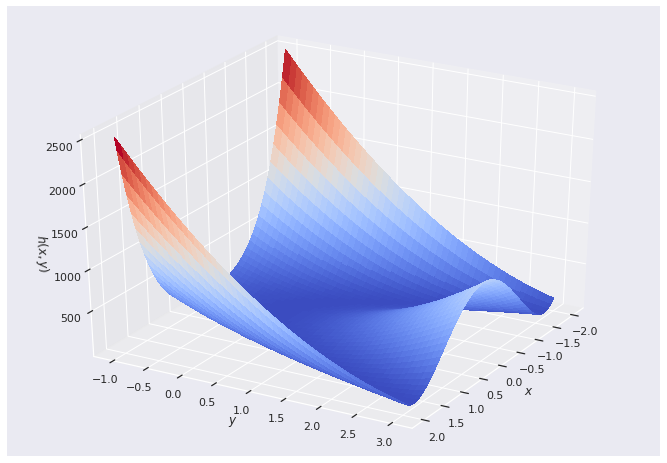

In [ ]:
"""
Create a function to plot h.
"""


def plot_h(x, y):
  X, Y = np.meshgrid(x, y)
  z = h(X, Y)

  # plot 3d
  fig = plt.figure()
  ax = fig.gca(projection='3d', elev=30, azim=30)
  surf = ax.plot_surface(X,
                         Y,
                         z,
                         cmap='coolwarm',
                         linewidth=0,
                         antialiased=False)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')
  ax.set_zlabel('$h(x, y)$')
  plt.show()


plot_h(x, y)

### Exercise 2.2
Knowing that a critical point of a function is a point where the gradient vanishes, show that $(1, 1)$ is the unique critical point of $h$.  Prove that this point is a minimum for $h$. 

YOUR ANSWER HERE

$
h(x,y)=100(y-x^2)^2+(1-x)^2=100x^4-200x^2y+x^2+100y^2-2x+1
$

$
\begin{cases}\frac{d}{dx}h(x,y)=400x^3-400xy+2x-2=0 \\ \frac{d}{dy}h(x,y)=-200x^2+200y=0\end{cases}\Rightarrow x=1, y=1\quad \text{so (1,1)  is the unique critical point of }h
$

\
$
|\Delta(h)|=
\begin{vmatrix}
  h_{xx} & h_{xy} \\  h_{yx} & h_{yy}
\end{vmatrix}=
\begin{vmatrix}
  1200x^2-400y+2 & -400x \\  -400x & 200
\end{vmatrix} = 80000x^2-80000y+400 \Rightarrow 
\begin{cases}|\Delta(h(1,1))| = 400 > 0 \\ h_{xx}(1,1) = 802 > 0\end{cases}\Rightarrow (1,1) \text{ is a minimum for } h
$

### Exercise 2.3
Write down the gradient descent iteration rule for this function. 

YOUR ANSWER HERE

$
w=w-\eta\vec\nabla h=w-\eta\binom{\frac{d}{dx}h(x,y)}{\frac{d}{dy}h(x,y)}
=w-\eta\binom{400x^3-400xy+2x-2}{-200x^2+200y}
$

### Exercise 2.4

Implement gradient descent. Try some different values of $\eta$. Does the algorithm converge? How fast? Make plots of the trajectories on top of a contour plot of $h$. (Hint: have a look at the example contour_example.py on Brightspace for inspiration to plot contours of functions and trajectories). Report your findings. Explain why numerical minimization with gradient descent is slow for this function.

First implement the derivative of $h(x,y)$.

In [ ]:
def dh_dxy(x, y):
  """
  This function is the derivative of the function h(x, y).

  Parameters
  ----------
  x : float
      data point from x-axis
  y : float
      data point from y-axis

  Returns
  -------
  vals : array
      NumPy array of parameter values computed during minimization
  """
  return np.array([-400 * x * (-x**2 + y) + 2 * x - 2, 200 * (y - x**2)])

Now implement the gradient descent algorithm.

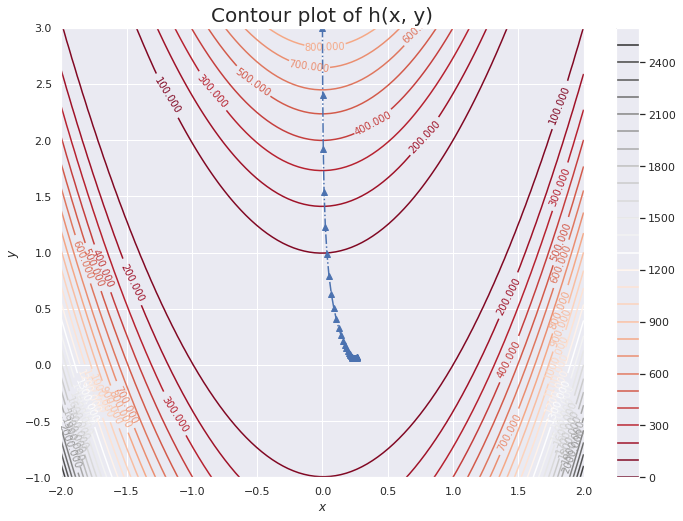

In [ ]:
def grad_descent(grad, val_init, eta=0.8, max_iter=50, tol=1e-5):
  """ This function implements the gradient descent algorithm.

  Parameters
  ----------
  grad : function
      Returns the derivative of the function with respect to the pair (x, y).
  val_init : tuple
      Initial values for parameters
  eta : float
      Gradient descent learning rate
  max_iter : int
      Maximum number of gradient descent iterations
  tol : float
      Tolerance for detecting convergence

  Returns
  -------
  vals : array
      NumPy array of parameter values computed during minimization
  dists : array
      NumPy array of distances from the current point to the previous point
  tot_iter : int
      Number of performed gradient descent iterations
  """
  vals = np.array(val_init).astype('float32')  # initial point
  vals_prev = vals.copy()
  dists = np.zeros(max_iter)
  points = []  # list of points (just for plotting)
  for tot_iter in range(max_iter):
    vals -= eta * grad(vals[0], vals[1])
    dist = np.linalg.norm(
        vals - vals_prev)  # distance between current and previous point
    if dist < tol:
      print(f'Converged after {tot_iter + 1} iterations.')
      break

    points.append(vals_prev.tolist())
    vals_prev = vals.copy()
    dists[tot_iter] = dist

  return vals, dists, tot_iter + 1, points


points = np.array(grad_descent(dh_dxy, (0, 3), 0.001, 50, 1e-04)[3])

# test gradient descent visually
x_interval = np.linspace(-2, 2, num=100)
y_interval = np.linspace(-1, 3, num=100)
X, Y = np.meshgrid(x_interval, y_interval)
Z = h(X, Y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, 30, cmap='RdGy')
ax.clabel(CS, inline=1, fontsize=10)
fig.colorbar(CS)

ax.plot(points[:, 0], points[:, 1], c='b', marker='^', linestyle='-.')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('Contour plot of h(x, y)', size=20)
plt.show()

Finally, run the gradient descent algorithm with different values of $\eta$.

Explain what you see!

YOUR ANSWER HERE

To ensure that the algorithm was working correctly, I added another output called *points* to the algorithm so that I could see the calculated points in each iteration.

\

The Python subtract operation fails when $\eta => 0.006$ and gives the following error:\
`RuntimeWarning: overflow encountered in subtract`\
For values such as $\eta = 0.005$, the algorithm diverges and the *minimum* point is not found well.\
The algorithm works well for $\eta <= 0.001$.\
If we consider the value of *tol* large (for example *tol* $= 1\mathrm{e}{-03})$, the algorithm converges and stops.\
Also, if we consider the value *max_iter* more, the algorithm has more time to find the *minimum* point.


## Exercise 3 (Optional)
Suppose we have two healthy but curiously mixed boxes of fruit, with one box containing 8 apples and 4 grapefruit and the other containing 15 apples and 3 grapefruit. One of the boxes is selected at random and a piece of fruit is picked (but not eaten) from the chosen box, with equal probability for each item in the box. The piece of fruit is returned and then once again from the *same* box a second piece is chosen at random. This is known as sampling with replacement. Model the box by random variable $B$, the first piece of fruit by variable $F_1$, and the second piece by $F_2$.
### Exercise 3.1
What is the probability that the first piece of fruit is an apple given that the second piece of fruit was a grapefruit? How can the result of the second pick affect the probability of the first pick?

YOUR ANSWER HERE


Please add the final result you got in the cell below! (Add it as a fraction, not an estimate. For example, write __1/3__, do not round to a number of decimals.)

In [ ]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit.
"""
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: ignored

### Exercise 3.2
Imagine now that after we remove a piece of fruit, it is not returned to the box. This is known as sampling without replacement. In this situation, recompute the probability that the first piece of fruit is an apple given that the second piece of fruit was a grapefruit. Explain the difference.

YOUR ANSWER HERE

Please add the final result you got in the cell below! (Add it as a fraction, not an estimate. For example, write __1/3__, do not round to a number of decimals.)

In [ ]:
"""
The variable p is probability of the first piece of fruit being
an apple given that the second piece of fruit was a grapefruit
when the sampling was done without replacement.
"""
# YOUR CODE HERE
raise NotImplementedError()

### Exercise 3.3
Starting from the initial situation (i.e., sampling with replacement), we add a dozen oranges to the first box and repeat the experiment. Show that now the outcome of the first pick has no impact on the probability that the second pick is a grapefruit. Are the two picks now dependent or independent? Explain your answer.

YOUR ANSWER HERE